In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from pandas.api.types import CategoricalDtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



#Dataset Preprocessing


dataset = pd.read_csv('dataset.csv')
dataset = dataset.set_index(dataset['PassengerId']).drop('PassengerId',axis=1)
dataset.index.name = ""
df = dataset.copy()
df.dropna(inplace=True)

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Name          6606 non-null   object 
 12  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 677.4+ KB


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [4]:
df['Cabin'].value_counts()

C/137/S     7
B/11/S      7
E/13/S      7
G/1476/S    7
G/734/S     7
           ..
G/651/P     1
G/650/S     1
F/867/P     1
C/205/S     1
B/311/S     1
Name: Cabin, Length: 5305, dtype: int64

In [5]:
df['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [6]:
for i in df['Name'].value_counts()[0:20].index:
    print(df[df['Name']==i])
    
#Checking same names are same data ?
#These names are not uniq but has uniq columns!

        HomePlanet CryoSleep     Cabin  Destination   Age    VIP  RoomService  \
                                                                                
3236_03      Earth     False   E/200/P  TRAPPIST-1e  18.0  False          0.0   
9071_01      Earth     False  F/1855/P  55 Cancri e  22.0  False          0.0   

         FoodCourt  ShoppingMall    Spa  VRDeck         Name  Transported  
                                                                           
3236_03       30.0           0.0  756.0     5.0  Anton Woody        False  
9071_01        0.0        1072.0   46.0     3.0  Anton Woody        False  
        HomePlanet CryoSleep    Cabin  Destination   Age    VIP  RoomService  \
                                                                               
6665_01     Europa      True  B/222/P  55 Cancri e  17.0  False          0.0   
7775_01     Europa     False  C/253/P  55 Cancri e  28.0  False          7.0   

         FoodCourt  ShoppingMall  Spa  VRDeck     

In [7]:
#Binary Variables
#According to descriptive statistics CryoSleep VIP Transported are binary variables


df['Transported'] = df['Transported'].astype('object')
dummies = pd.get_dummies(df[['CryoSleep','VIP','Transported']])
dummies = dummies[['CryoSleep_True','VIP_True','Transported_True']].rename({
    'CryoSleep_True':'has_CryoSleep',
    'VIP_True':'is_VIP',
    'Transported_True':'is_Transported'
},axis=1)

df = df.drop(columns=[df.columns[1],df.columns[5],df.columns[12]],axis=1)
df



,HomePlanet,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
,,,,,,,,,,
0001_01,Europa,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
0002_01,Earth,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
0003_01,Europa,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
0003_02,Europa,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
0004_01,Earth,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
9278_01,Earth,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
9279_01,Earth,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon


In [8]:
df = pd.concat([df,dummies],axis=1)
df

,HomePlanet,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,has_CryoSleep,is_VIP,is_Transported
,,,,,,,,,,,,,
0001_01,Europa,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0
0002_01,Earth,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,0,1
0003_01,Europa,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,0
0003_02,Europa,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,0
0004_01,Earth,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1,0
9278_01,Earth,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,1,0,0
9279_01,Earth,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      6606 non-null   object 
 1   Cabin           6606 non-null   object 
 2   Destination     6606 non-null   object 
 3   Age             6606 non-null   float64
 4   RoomService     6606 non-null   float64
 5   FoodCourt       6606 non-null   float64
 6   ShoppingMall    6606 non-null   float64
 7   Spa             6606 non-null   float64
 8   VRDeck          6606 non-null   float64
 9   Name            6606 non-null   object 
 10  has_CryoSleep   6606 non-null   uint8  
 11  is_VIP          6606 non-null   uint8  
 12  is_Transported  6606 non-null   uint8  
dtypes: float64(6), object(4), uint8(3)
memory usage: 587.1+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6606.0,28.894036,14.533429,0.0,19.0,27.0,38.00,79.0
RoomService,6606.0,222.991674,644.987936,0.0,0.0,0.0,49.00,9920.0
FoodCourt,6606.0,478.958523,1678.592291,0.0,0.0,0.0,82.75,29813.0
ShoppingMall,6606.0,178.356494,576.328407,0.0,0.0,0.0,30.00,12253.0
Spa,6606.0,313.161520,1144.016291,0.0,0.0,0.0,65.00,22408.0
VRDeck,6606.0,303.780048,1127.142166,0.0,0.0,0.0,52.00,20336.0
has_CryoSleep,6606.0,0.353012,0.477943,0.0,0.0,0.0,1.00,1.0
is_VIP,6606.0,0.024523,0.154678,0.0,0.0,0.0,0.00,1.0
is_Transported,6606.0,0.503633,0.500025,0.0,0.0,1.0,1.00,1.0


In [11]:
df['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

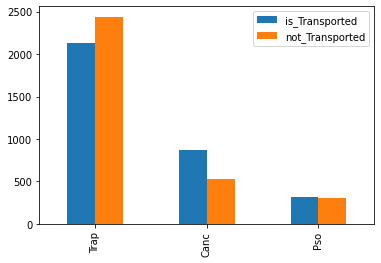

In [12]:
#Categorical Variables to integer vars

import matplotlib.pyplot as plt

dest_trap_values = df[df['Destination'] == 'TRAPPIST-1e']['is_Transported'].value_counts()
dest_canc_values = df[df['Destination'] == '55 Cancri e']['is_Transported'].value_counts()
dest_pso_values = df[df['Destination'] == 'PSO J318.5-22']['is_Transported'].value_counts()

comparsions = pd.DataFrame({
    'is_Transported':[dest_trap_values[1],dest_canc_values[1],dest_pso_values[1]],
    'not_Transported':[dest_trap_values[0],dest_canc_values[0],dest_pso_values[0]]
},index = ['Trap','Canc','Pso'])

comparsions.plot(kind='bar')
plt.show()

#According to barplot results there is no significance difference in Destination column
#Categorical Order --> Trap<pso<canc

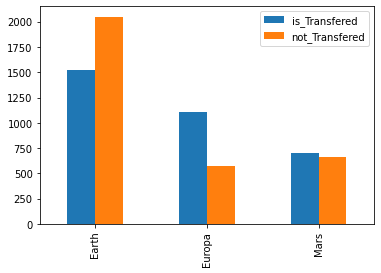

In [13]:
hp_earth = df[df['HomePlanet'] == 'Earth']['is_Transported'].value_counts()
hp_europa = df[df['HomePlanet']=='Europa']['is_Transported'].value_counts()
hp_mars = df[df['HomePlanet']=='Mars']['is_Transported'].value_counts()

hp_comp = pd.DataFrame({
    'is_Transfered':[hp_earth[1],hp_europa[1],hp_mars[1]],
    'not_Transfered':[hp_earth[0],hp_europa[0],hp_mars[0]],
},index = ['Earth','Europa','Mars'])

hp_comp.plot(kind='bar')
plt.show()

#Categorical order earth<mars<europa

In [14]:
df['Destination']=df['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2}).astype('float64')
df['HomePlanet']=df['HomePlanet'].replace({'Earth':0,'Mars':1,'Europa':2}).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      6606 non-null   float64
 1   Cabin           6606 non-null   object 
 2   Destination     6606 non-null   float64
 3   Age             6606 non-null   float64
 4   RoomService     6606 non-null   float64
 5   FoodCourt       6606 non-null   float64
 6   ShoppingMall    6606 non-null   float64
 7   Spa             6606 non-null   float64
 8   VRDeck          6606 non-null   float64
 9   Name            6606 non-null   object 
 10  has_CryoSleep   6606 non-null   uint8  
 11  is_VIP          6606 non-null   uint8  
 12  is_Transported  6606 non-null   uint8  
dtypes: float64(8), object(2), uint8(3)
memory usage: 587.1+ KB


In [15]:
my_order = [0,1,2]


df['HomePlanet'] = df['HomePlanet'].astype(
    CategoricalDtype(
        categories=my_order,
        ordered=True
    )
)

df['Destination'] = df['Destination'].astype(
    CategoricalDtype(
        categories=my_order,
        ordered=True
    )
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HomePlanet      6606 non-null   category
 1   Cabin           6606 non-null   object  
 2   Destination     6606 non-null   category
 3   Age             6606 non-null   float64 
 4   RoomService     6606 non-null   float64 
 5   FoodCourt       6606 non-null   float64 
 6   ShoppingMall    6606 non-null   float64 
 7   Spa             6606 non-null   float64 
 8   VRDeck          6606 non-null   float64 
 9   Name            6606 non-null   object  
 10  has_CryoSleep   6606 non-null   uint8   
 11  is_VIP          6606 non-null   uint8   
 12  is_Transported  6606 non-null   uint8   
dtypes: category(2), float64(6), object(2), uint8(3)
memory usage: 497.0+ KB


In [16]:
x = df.select_dtypes(include=['float64','uint8','category']).drop('is_Transported',axis=1)

In [17]:
y = df['is_Transported']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42
)

print(f'Xtrain : {xtrain.shape}\nXtest : {xtest.shape}\nYtrain : {ytrain.shape}\nYtest : {ytest.shape}')

Xtrain : (4624, 10)
Xtest : (1982, 10)
Ytrain : (4624,)
Ytest : (1982,)


DecisionTreeClassifier Model

In [19]:
cart_model = DecisionTreeClassifier().fit(xtrain,ytrain)


In [23]:
print(f'Default Test Accuary Score : {accuracy_score(ytest,cart_model.predict(xtest))}')
?cart_model

Default Test Accuary Score : 0.760343087790111


Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an i

DecisionTreeClassifier Model Tuning

In [25]:
def_cart_model = DecisionTreeClassifier()
cart_params = {
    'max_depth':np.arange(1,11),
    'min_samples_split':np.arange(2,51),
}
cart_cvmodel = GridSearchCV(
    def_cart_model,
    cart_params,
    cv=10,
    n_jobs=-1,
    verbose=2
)
cart_cvmodel.fit(xtrain,ytrain)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=2)

Fitting Tuned Model & Calculate Test Accuarcy Score

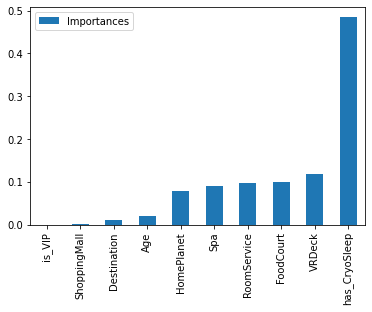

In [26]:
cart_tunedmodel = DecisionTreeClassifier(

    max_depth=cart_cvmodel.best_params_['max_depth'],
    min_samples_split=cart_cvmodel.best_params_['min_samples_split']

).fit(xtrain,ytrain)

cart_test_acc = accuracy_score(ytest,cart_tunedmodel.predict(xtest))

importances_of_cart = pd.DataFrame({
    'Importances':cart_cvmodel.best_estimator_.feature_importances_
},index=xtrain.columns)

importances_of_cart.sort_values(by='Importances').plot(kind='bar')
plt.show()

In [28]:
#According to results of DecisionTreeClassifier,
#Results show us having CyroSleep is most important thing when transporting


KNeighborsClassifier Model

In [41]:
knn_model = KNeighborsClassifier().fit(xtrain,ytrain)
print('Default KNeighborsClassifier Test Error : {:.2f}'.format(accuracy_score(ytest,knn_model.predict(xtest))))
?knn_model

Default KNeighborsClassifier Test Error : 0.78


Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the

KNN Optimization

In [42]:
def_knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors':np.arange(1,51)
}
knn_cvtuned = GridSearchCV(
    def_knn_model,
    knn_params,
    cv=10,
    n_jobs=-1,
    verbose=2
)

knn_cvtuned.fit(xtrain,ytrain)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=2)

In [44]:
knn_tunedmodel = KNeighborsClassifier(
    n_neighbors=knn_cvtuned.best_params_['n_neighbors']
).fit(xtrain,ytrain)

knn_test_acc = accuracy_score(ytest,knn_tunedmodel.predict(xtest))

knn_test_acc

0.8002018163471241

Random Forest Model

In [48]:
rf_model = RandomForestClassifier().fit(xtrain,ytrain)
print(f'Default Test Acc RFC : {accuracy_score(ytest,rf_model.predict(xtest))}')

Default Test Acc RFC : 0.8002018163471241


RF Optimization & Feature Importances

In [49]:
def_rf_model = RandomForestClassifier()
rf_params = {
    'max_depth':[2,3,5,8,10],
    'min_samples_split':[2,3,5,8,10],
    'n_estimators':[10,500,1000],
    'max_features':[2,5,8]
}
rf_cvmodel = GridSearchCV(
    def_rf_model,
    rf_params,
    cv=10,
    n_jobs=-1,
    verbose=2
)
rf_cvmodel.fit(xtrain,ytrain)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [2, 5, 8],
                         'min_samples_split': [2, 3, 5, 8, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

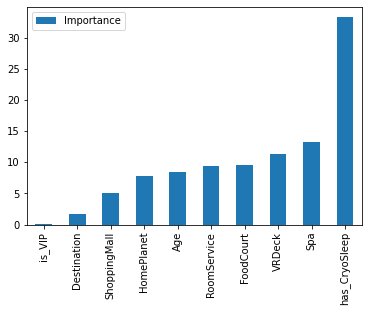

In [50]:
rf_tunedmodel = RandomForestClassifier(
    max_depth=rf_cvmodel.best_params_['max_depth'],
    min_samples_split=rf_cvmodel.best_params_['min_samples_split'],
    n_estimators=rf_cvmodel.best_params_['n_estimators'],
    max_features=rf_cvmodel.best_params_['max_features']
).fit(xtrain,ytrain)

rf_test_acc = accuracy_score(ytest,rf_tunedmodel.predict(xtest))

importances_of_rf = pd.DataFrame({
    'Importance':rf_tunedmodel.feature_importances_*100
},index=xtrain.columns)

importances_of_rf.sort_values(by='Importance',axis=0).plot(kind='bar')
plt.show()

In [51]:
rf_test_acc

0.8087790110998991

LogisticRegression Model

In [52]:
logistic_model = LogisticRegression().fit(xtrain,ytrain)
print(f'Default Test Acc Score Logistic : {accuracy_score(ytest,logistic_model.predict(xtest))}')

Default Test Acc Score Logistic : 0.8002018163471241


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Optimization

In [55]:
from sklearn.model_selection import KFold,cross_val_score


kcv = KFold(n_splits=10,shuffle=True,random_state=42)
def_log_model = LogisticRegression(solver='liblinear').fit(xtrain,ytrain)

log_test_acc = cross_val_score(def_log_model,xtest,ytest,cv=kcv).mean()

In [56]:
log_test_acc

0.7900842596822496

Neural Networks Classifier Model

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [58]:
neu_model = MLPClassifier().fit(xtrainscaled,ytrain)
print(f'NeuralNetworkClassifier Default Test Score : {accuracy_score(ytest,neu_model.predict(xtest))}')

NeuralNetworkClassifier Default Test Score : 0.7896064581231079


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Neural Network Model Optimization

In [59]:
?neu_model

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs'

In [60]:
neu_params = {
    'hidden_layer_sizes':[(10,10,10),
                        (100,100,100),
                        (100,100),
                        (3,5),
                        (5,3)],
    'activation':['logistic','relu'],
    'alpha':[0.1,0.01,0.02,0.005,0.0001,0.0000005],
    'solver':['lbfgs','adam','sgd']
}

def_neu_model = MLPClassifier()
neu_cvmodel = GridSearchCV(
    def_neu_model,
    neu_params,
    cv=10,
    n_jobs=-1,
    verbose=2
)

neu_cvmodel.fit(xtrainscaled,ytrain)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 5e-07],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [61]:
neu_tunedmodel = MLPClassifier(hidden_layer_sizes=neu_cvmodel.best_params_['hidden_layer_sizes'],
                        activation=neu_cvmodel.best_params_['activation'],
                        solver = neu_cvmodel.best_params_['solver'],
                        alpha=neu_cvmodel.best_params_['alpha']).fit(xtrainscaled,ytrain)

neu_test_acc = accuracy_score(ytest,neu_tunedmodel.predict(xtestscaled))
neu_test_acc


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8072653884964682

Finding Best Model and Predictions

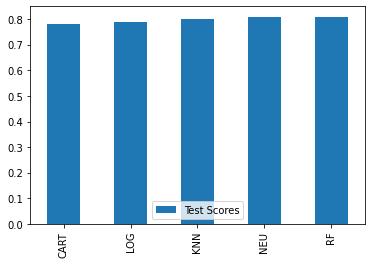

In [62]:
best_model = pd.DataFrame({
    'Test Scores':[rf_test_acc,neu_test_acc,cart_test_acc,knn_test_acc,log_test_acc]
},index=['RF','NEU','CART','KNN','LOG'])

best_model.sort_values(by='Test Scores').plot(kind='bar')
plt.show()

In [67]:
#DataSet for estimating
#Quick Preprocessing
estimate = pd.read_csv('data_for_estimate.csv')
estimate = estimate.set_index(estimate['PassengerId']).drop('PassengerId',axis=1)
estimate.index.name = ''



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [68]:
estimate['Destination']=estimate['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2}).astype('float64')
estimate['HomePlanet']=estimate['HomePlanet'].replace({'Earth':0,'Mars':1,'Europa':2}).astype('float64')
estimate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   float64
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   float64
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(8), object(4)
memory usage: 434.4+ KB


In [ ]:
dummies1 = pd.get_dummies(estimate[['CryoSleep','VIP']])
dummies1 = dummies1[['CryoSleep_True','VIP_True']].rename({
    'CryoSleep_True':'has_CryoSleep',
    'VIP_True':'is_VIP',
},axis=1)

estimate = estimate.drop(columns=[estimate.columns[1],estimate.columns[5]],axis=1)
new_est = pd.concat([estimate,dummies1],axis=1)


In [74]:
new_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     4190 non-null   float64
 1   Cabin          4177 non-null   object 
 2   Destination    4185 non-null   float64
 3   Age            4186 non-null   float64
 4   RoomService    4195 non-null   float64
 5   FoodCourt      4171 non-null   float64
 6   ShoppingMall   4179 non-null   float64
 7   Spa            4176 non-null   float64
 8   VRDeck         4197 non-null   float64
 9   Name           4183 non-null   object 
 10  has_CryoSleep  4277 non-null   uint8  
 11  is_VIP         4277 non-null   uint8  
dtypes: float64(8), object(2), uint8(2)
memory usage: 375.9+ KB


In [75]:
new_est['HomePlanet'] = new_est['HomePlanet'].astype(
    CategoricalDtype(
        categories=my_order,
        ordered=True
    )
)

new_est['Destination'] = new_est['Destination'].astype(
    CategoricalDtype(
        categories=my_order,
        ordered=True
    )
)

new_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   HomePlanet     4190 non-null   category
 1   Cabin          4177 non-null   object  
 2   Destination    4185 non-null   category
 3   Age            4186 non-null   float64 
 4   RoomService    4195 non-null   float64 
 5   FoodCourt      4171 non-null   float64 
 6   ShoppingMall   4179 non-null   float64 
 7   Spa            4176 non-null   float64 
 8   VRDeck         4197 non-null   float64 
 9   Name           4183 non-null   object  
 10  has_CryoSleep  4277 non-null   uint8   
 11  is_VIP         4277 non-null   uint8   
dtypes: category(2), float64(6), object(2), uint8(2)
memory usage: 317.7+ KB


In [81]:
x_est = new_est.select_dtypes(include=['float64','uint8','category'])
x_est.dropna(inplace=True)

C:\Users\acer\AppData\Local\Temp/ipykernel_11460/3721581135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_est.dropna(inplace=True)


In [83]:
predictions = pd.DataFrame({
    'Id':x_est.index,
    'Transported':rf_tunedmodel.predict(x_est)
})

predictions.to_csv('predictions.csv',index=None)

It was a kaggle competition, Random Forest Models's Prediction Accuarcy Test Score = 0.86